# Download and place the data in a dataframe

In [1]:
import pandas as pd

## df = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch10/housing.data.txt',header = None, sep = '\s+')
## df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

df = pd.read_csv('housing-data', sep = ',')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Always look at the data to find its important characteristics

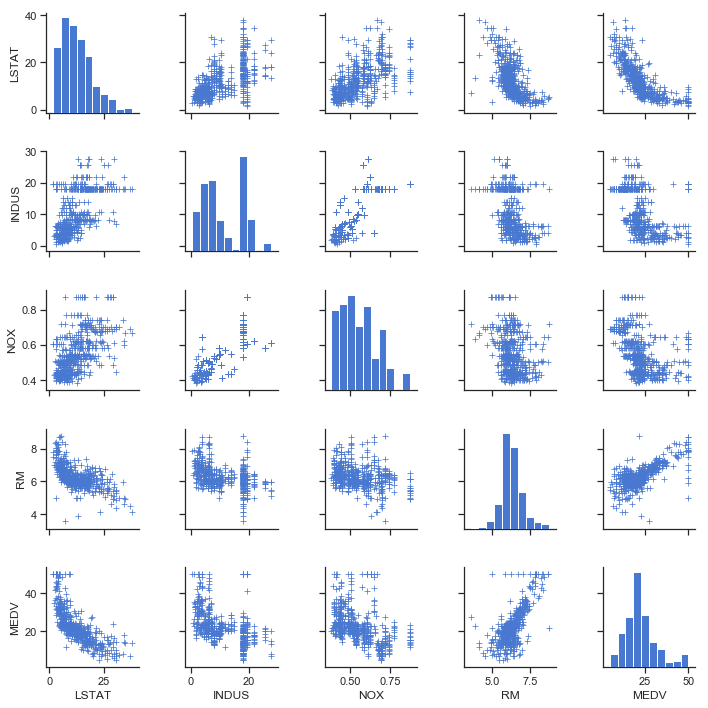

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a range of columns
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

# pairwise scatterplots
sns.set(color_codes = True, palette = "muted", style = "ticks")
sns.pairplot(df[cols], height = 2, markers = "+")
plt.tight_layout()
plt.show()


# Correlation matrix and its visualization

In [5]:
corr = df[cols].corr()
corr

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,0.695360
MEDV,-0.737663,-0.483725,-0.427321,0.695360,1.000000


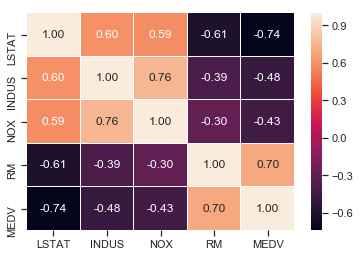

In [6]:
# Better presentation
## f, ax = plt.subplots(figsize=(10, 5))
corr
sns.heatmap(round(corr,2), annot=True,  fmt='.2f', linewidths=.05)
## t = f.suptitle('Correlation matrix housing data', fontsize=12)

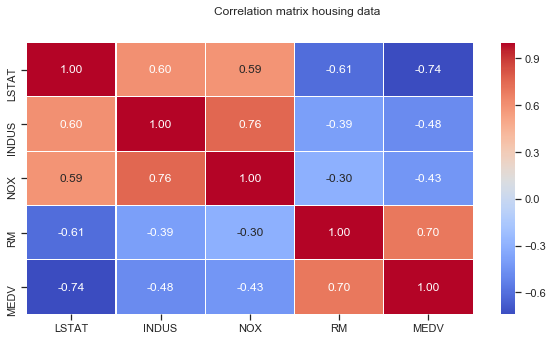

In [7]:
# Even better
f, ax = plt.subplots(figsize=(10, 5))
corr
sns.heatmap(round(corr,2), annot=True,  ax=ax, cmap = "coolwarm", fmt='.2f', linewidths=.05)
t = f.suptitle('Correlation matrix housing data', fontsize=12)

# Simple linear regression
There is a positive high correlation between RM (mean number of rooms per dwelling) and MEDV (median value of dwelling). Let's explore this relationship seeking to fit a linear regression model.

In [8]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
X = df[['RM']].values
y = df[['MEDV']].values
slr.fit(X, y)

print ('Slope: %3f' % slr.coef_[0])

Slope: 9.102109


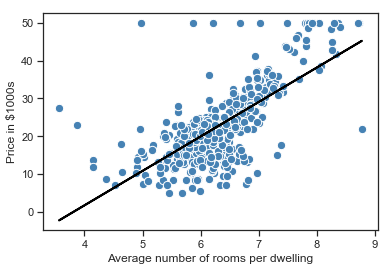

In [9]:
# Build our own function to plot the linear regression
def lin_regplot(X, y, model):
    plt.scatter(X, y, c = 'steelblue', edgecolor = 'white', s=70)
    plt.plot(X, model.predict(X), color = 'black', lw = 2)
    return None

lin_regplot(X, y, slr)
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Price in $1000s')
plt.show()

# Evaluating the performance of the linear regression model
We slice the data into two sets. On the first set (the training dataset) we fit the model, and on the second set (the test dataset) we evaluate the performance of the model.


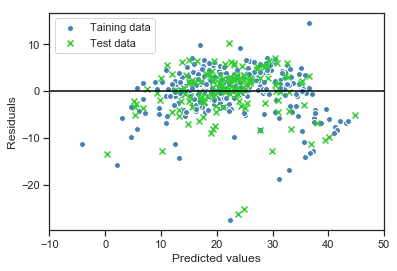

In [10]:
### X = df[['RM']].values ## for simple regression
X = df.iloc[:,:-1].values  # Select all variables (except MEDV) as explanatory variables
y = df[['MEDV']].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
slr = LinearRegression()
slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

plt.scatter(y_train_pred, y_train_pred - y_train, c = 'steelblue', marker = 'o', edgecolor = 'white', label = 'Taining data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'limegreen', marker = 'x', edgecolor = 'white', label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y=0, xmin = -10, xmax = 50, color = 'black')
plt.xlim(-10, 50)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()